## NLP with DL (word embedding from trained model)

### Import libraries

In [1]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Embedding
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
df = pd.read_csv('hepsiburada.csv')

In [3]:
df

,Rating,Review
0,1,3 yıldır tık demedi. :)
1,1,3 yıldır kullanıyorum müthiş
2,1,Ürün bugün elime geçti çok fazla inceleme fırs...
3,1,Almaya karar verdim. Hemencecik geldi. Keyifle...
4,1,Günlük kullanımınızı çok çok iyi karsılıyor kı...
...,...,...
243492,1,fiyatına göre güzel
243493,1,Ürün kullanışlı iş görüyor fazlasıyla eşime al...
243494,1,"Hızlı Kargo, güzel ürün"
243495,1,telefon başarılı hızlı bir cihaz sadece beyaz...


### Tokenization

In [4]:
X = df['Review'].values
y = df['Rating'].values

In [5]:
num_words = 15000 # corpusta geçen en fazla kullanılan ilk 15.000 kelimeyi alacağız gerisini yok sayacağız. 
# None değeri atanırsa tüm kelimeler dikkate alınır.
tokenizer = Tokenizer(num_words=num_words, filters='')

In [6]:
tokenizer.fit_on_texts(X)

### Creating Word Index

In [7]:
tokenizer.word_index

{'çok': 1,
 'bir': 2,
 've': 3,
 'ürün': 4,
 'bu': 5,
 'için': 6,
 'tavsiye': 7,
 'iyi': 8,
 'daha': 9,
 'güzel': 10,
 'ama': 11,
 'da': 12,
 'gayet': 13,
 'de': 14,
 'hızlı': 15,
 'ürünü': 16,
 'olarak': 17,
 'gibi': 18,
 'en': 19,
 'ederim.': 20,
 'elime': 21,
 'ile': 22,
 'kadar': 23,
 'göre': 24,
 'teşekkürler': 25,
 'ederim': 26,
 'kargo': 27,
 'kaliteli': 28,
 'uygun': 29,
 'aldım': 30,
 'fiyata': 31,
 'fiyat': 32,
 'gerçekten': 33,
 'gün': 34,
 'ben': 35,
 'sonra': 36,
 '2': 37,
 'cok': 38,
 'kesinlikle': 39,
 'biraz': 40,
 'hiç': 41,
 'memnun': 42,
 'yok': 43,
 'hem': 44,
 '1': 45,
 'telefon': 46,
 'önce': 47,
 'sipariş': 48,
 'ürün.': 49,
 'her': 50,
 'tek': 51,
 'bi': 52,
 'kalitesi': 53,
 'hepsiburada': 54,
 'var': 55,
 'mükemmel': 56,
 'teşekkür': 57,
 'ne': 58,
 'geldi': 59,
 'kullanışlı': 60,
 'fiyatı': 61,
 'uzun': 62,
 'bile': 63,
 'aldım.': 64,
 'tam': 65,
 'olması': 66,
 'bence': 67,
 'ilk': 68,
 'fazla': 69,
 'ayrıca': 70,
 '3': 71,
 'harika': 72,
 'o': 73,
 'şarj': 

In [8]:
len(tokenizer.word_index)

365701

### Converting Tokens To Numeric

In [12]:
X_num_tokens = tokenizer.texts_to_sequences(X)

In [13]:
X[105]

'Logitech ürünlerinin geneli kalite olarak çok iyidir. Adedini tam saymadım ama 10 un üzerinde kendime akrabalarıma arkadaşlarıma almışımdır hepside memnunlar. İhtiyacı olan kaçırmasın başkada ürün aramasın derim.'

In [14]:
print(X_num_tokens[105])

[1893, 5451, 144, 17, 1, 4520, 65, 11, 134, 1529, 304, 782, 3330, 6959, 13469, 3048, 104, 3421, 9414, 4, 303]


In [15]:
num_tokens = [len(tokens) for tokens in X_num_tokens]
num_tokens = np.array(num_tokens)

### Maximum Number Of Tokens For All Documents

In [16]:
num_tokens.mean()

19.890232733873518

In [17]:
num_tokens.max()

274

In [18]:
num_tokens.argmax() # listedeki en uzun yorumun indexini argmax ile bulabiliyoruz.

212558

In [19]:
max_tokens = 61

In [20]:
sum(num_tokens < max_tokens) / len(num_tokens)

0.966759344057627

### Fixing Token Counts Of All Documents (pad_sequences)

In [21]:
X_pad = pad_sequences(X_num_tokens, maxlen=max_tokens)

In [22]:
X_pad.shape

(243497, 61)

In [23]:
np.array(X_num_tokens[800])

array([   16,   334,    71,   186,    23,   152,  8452,    98,   200,
         628, 11434,     3,    35,   108,   159,   689,    83,     1,
        4989,   783,    23,     2,   370,   842,     3,     1,   147,
         133,   544,     7,    20])

In [24]:
X_pad[800]

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,    16,   334,    71,   186,    23,   152,
        8452,    98,   200,   628, 11434,     3,    35,   108,   159,
         689,    83,     1,  4989,   783,    23,     2,   370,   842,
           3,     1,   147,   133,   544,     7,    20])

### Converting Numeric Tokens To String

In [25]:
index = tokenizer.word_index
inverse_map = dict(zip(index.values(), index.keys()))
inverse_map

{1: 'çok',
 2: 'bir',
 3: 've',
 4: 'ürün',
 5: 'bu',
 6: 'için',
 7: 'tavsiye',
 8: 'iyi',
 9: 'daha',
 10: 'güzel',
 11: 'ama',
 12: 'da',
 13: 'gayet',
 14: 'de',
 15: 'hızlı',
 16: 'ürünü',
 17: 'olarak',
 18: 'gibi',
 19: 'en',
 20: 'ederim.',
 21: 'elime',
 22: 'ile',
 23: 'kadar',
 24: 'göre',
 25: 'teşekkürler',
 26: 'ederim',
 27: 'kargo',
 28: 'kaliteli',
 29: 'uygun',
 30: 'aldım',
 31: 'fiyata',
 32: 'fiyat',
 33: 'gerçekten',
 34: 'gün',
 35: 'ben',
 36: 'sonra',
 37: '2',
 38: 'cok',
 39: 'kesinlikle',
 40: 'biraz',
 41: 'hiç',
 42: 'memnun',
 43: 'yok',
 44: 'hem',
 45: '1',
 46: 'telefon',
 47: 'önce',
 48: 'sipariş',
 49: 'ürün.',
 50: 'her',
 51: 'tek',
 52: 'bi',
 53: 'kalitesi',
 54: 'hepsiburada',
 55: 'var',
 56: 'mükemmel',
 57: 'teşekkür',
 58: 'ne',
 59: 'geldi',
 60: 'kullanışlı',
 61: 'fiyatı',
 62: 'uzun',
 63: 'bile',
 64: 'aldım.',
 65: 'tam',
 66: 'olması',
 67: 'bence',
 68: 'ilk',
 69: 'fazla',
 70: 'ayrıca',
 71: '3',
 72: 'harika',
 73: 'o',
 74: 'şar

In [26]:
def tokens_to_string(tokens):
    words = [inverse_map[token] for token in tokens if token!=0]
    text = ' '.join(words)
    return text

In [27]:
X[800]

'ürünü alalı 3 hafta kadar oldu. aralıksız kullanıyorum bilgisyarım sürekli açık durur ve ben günde yaklaşık 12 saat başındayım mousesu çok kullanırım. şimdiye kadar bir problem yaşamadım ve çok memnunum almak isteyenlere tavsiye ederim.'

In [28]:
tokens_to_string(X_num_tokens[800])

'ürünü alalı 3 hafta kadar oldu. aralıksız kullanıyorum sürekli açık durur ve ben günde yaklaşık 12 saat çok kullanırım. şimdiye kadar bir problem yaşamadım ve çok memnunum almak isteyenlere tavsiye ederim.'

### Train Set Split

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size=0.2, stratify=y, random_state=101)

### Modelling

In [31]:
model = Sequential()

In [32]:
embedding_size = 300

In [33]:
word2vec = {}
with open('glove.840B.300d.txt', encoding='UTF-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        vec = np.asarray(values[-300:], dtype='float32')
        word2vec[word] = vec

In [182]:
len(word2vec)

2195885

In [192]:
word2vec.get("çok")

array([ 1.1154   , -0.53589  ,  1.2622   ,  0.78801  , -0.34619  ,
        0.22677  , -0.065052 , -0.62093  ,  0.55034  , -1.5217   ,
       -0.72767  , -0.058045 ,  0.079614 , -0.030332 ,  0.024334 ,
        0.60943  ,  0.12625  , -0.53175  , -0.72954  , -0.11631  ,
       -0.14443  , -0.65071  , -0.018333 ,  0.73479  ,  0.179    ,
       -0.21739  ,  0.64475  , -0.35272  ,  0.43549  ,  0.74     ,
        0.17232  , -0.11564  ,  0.23115  , -0.37752  , -0.077053 ,
        0.3032   ,  0.13127  ,  1.2757   ,  0.014064 , -0.19996  ,
       -0.65147  , -0.44277  , -0.18834  , -0.35396  ,  0.052747 ,
       -0.38509  , -0.36061  ,  0.17494  ,  0.5411   ,  0.61127  ,
       -0.15253  ,  0.14218  ,  0.50821  ,  0.098815 , -0.40387  ,
       -0.0021765,  0.074953 ,  0.3984   , -0.058698 ,  0.165    ,
       -0.45651  , -0.53052  ,  0.27632  ,  0.10976  , -0.024414 ,
        0.47331  ,  0.76887  , -0.96269  , -0.020398 , -1.0196   ,
       -0.15138  ,  0.22317  , -0.099524 , -0.04943  , -0.4968

In [34]:
embedding_matrix = np.random.uniform(-1, 1, (num_words, embedding_size))
for word, i in tokenizer.word_index.items():
    if i < num_words:
        embedding_vector = word2vec.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

In [193]:
embedding_matrix[1:]

array([[ 1.11539996, -0.53588998,  1.2622    , ..., -0.45364001,
        -0.72083998, -0.29815   ],
       [ 0.38424   , -0.86006999,  1.14830005, ..., -0.02432   ,
        -0.41472   , -0.048794  ],
       [ 0.066159  , -0.33603001, -0.07188   , ..., -0.35600999,
         0.066252  , -0.15593   ],
       ...,
       [ 0.29345369, -0.67476824,  0.61013489, ..., -0.62648272,
         0.89582319,  0.25099487],
       [-0.84468322, -0.37063136, -0.56049696, ...,  0.38408381,
         0.56949197,  0.41089978],
       [ 0.74347788, -0.31369448, -0.70532562, ...,  0.88660172,
        -0.2573856 ,  0.12647669]])

In [35]:
model.add(Embedding(input_dim=num_words,
                    output_dim=embedding_size,
                    weights=[embedding_matrix],
                    input_length=max_tokens,
                    trainable=True,
                    name='embedding_layer'))

In [36]:
# pip install -U numpy==1.19.5

In [37]:
model.add(GRU(units=48, return_sequences=True))
model.add(GRU(units=24, return_sequences=True))
model.add(GRU(units=12))
model.add(Dense(1, activation='sigmoid'))

In [38]:
optimizer = Adam(lr=0.004)

In [39]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=['Recall'])

In [40]:
model.summary() #  (16*16 + 50*16 +2*16 )*3 ==>3 x(n2 + nm + 2n) m= 50 input, n= 16 output
# (8*8 + 16*8 + 2*8) *3

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_layer (Embedding)  (None, 61, 300)           4500000   
_________________________________________________________________
gru (GRU)                    (None, 61, 48)            50400     
_________________________________________________________________
gru_1 (GRU)                  (None, 61, 24)            5328      
_________________________________________________________________
gru_2 (GRU)                  (None, 12)                1368      
_________________________________________________________________
dense (Dense)                (None, 1)                 13        
Total params: 4,557,109
Trainable params: 4,557,109
Non-trainable params: 0
_________________________________________________________________


In [41]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor="val_loss", mode="auto", 
                           verbose=1, patience = 5, restore_best_weights=True)

In [42]:
pd.Series(y_train).value_counts(normalize=True)

1    0.943834
0    0.056166
dtype: float64

In [43]:
weights = {0:95, 1:5}

In [44]:
model.fit(X_train, y_train, epochs=25, batch_size=256, class_weight=weights,
         validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/25
761/761 [==============================] - 224s 288ms/step - loss: 4.1054 - recall: 0.7854 - val_loss: 0.2872 - val_recall: 0.8825
Epoch 2/25
761/761 [==============================] - 215s 283ms/step - loss: 1.8461 - recall: 0.9232 - val_loss: 0.2609 - val_recall: 0.9038
Epoch 3/25
761/761 [==============================] - 258s 339ms/step - loss: 1.1320 - recall: 0.9567 - val_loss: 0.2204 - val_recall: 0.9309
Epoch 4/25
761/761 [==============================] - 244s 321ms/step - loss: 0.8389 - recall: 0.9692 - val_loss: 0.1779 - val_recall: 0.9528
Epoch 5/25
761/761 [==============================] - 252s 331ms/step - loss: 0.6267 - recall: 0.9764 - val_loss: 0.2232 - val_recall: 0.9381
Epoch 6/25
761/761 [==============================] - 260s 342ms/step - loss: 0.4867 - recall: 0.9820 - val_loss: 0.2084 - val_recall: 0.9517
Epoch 7/25
761/761 [==============================] - 236s 310ms/step - loss: 0.4432 - recall: 0.9843 - val_loss: 0.2064 - val_recall: 0.9569
Epoch 

### Model Evaluation

In [45]:
model_loss = pd.DataFrame(model.history.history)
model_loss.head()

,loss,recall,val_loss,val_recall
0,3.360155,0.838955,0.287209,0.882476
1,1.881979,0.923320,0.260904,0.903796
2,1.197370,0.953355,0.220433,0.930926
3,0.893440,0.965897,0.177878,0.952834
4,0.709057,0.973925,0.223177,0.938105


<AxesSubplot:>

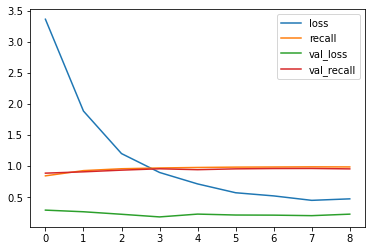

In [46]:
model_loss.plot()

In [59]:
model.evaluate(X_train, y_train)

6088/6088 [==============================] - 177s 29ms/step - loss: 0.0723 - recall: 0.9763


[0.07229882478713989, 0.9762858152389526]

In [60]:
model.evaluate(X_test, y_test)

1522/1522 [==============================] - 44s 29ms/step - loss: 0.1773 - recall: 0.9534: 34s - loss: 0.1791 - re - ETA: 34s - loss: 0.1795 - recall: - ETA: 33s - loss: 0.1782 - rec - ETA: 1s - loss: 0.176 - ETA: 0s - los - ETA: 0s - loss: 0.1775 - recall: 0.


[0.1772991567850113, 0.9534210562705994]

In [48]:
y_pred_train = model.predict(X_train)
y_pred_train

array([[0.9847127 ],
       [0.99804235],
       [0.99392307],
       ...,
       [0.9977064 ],
       [0.9977406 ],
       [0.00232336]], dtype=float32)

In [49]:
y_pred_tr = np.array([1.0 if p>0.5 else 0.0 for p in y_pred_train])

In [50]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, roc_auc_score

print(confusion_matrix(y_train, y_pred_tr))
print("-------------------------------------------------------")
print(classification_report(y_train, y_pred_tr))

[[ 10794    147]
 [  4082 179774]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.73      0.99      0.84     10941
           1       1.00      0.98      0.99    183856

    accuracy                           0.98    194797
   macro avg       0.86      0.98      0.91    194797
weighted avg       0.98      0.98      0.98    194797



In [52]:
y_pred = model.predict(X_test)
y_pred

array([[0.99814916],
       [0.99749476],
       [0.99473315],
       ...,
       [0.9982841 ],
       [0.99455154],
       [0.4656598 ]], dtype=float32)

In [53]:
y_pr = np.array([1.0 if p>0.5 else 0.0 for p in y_pred])

In [54]:
print(confusion_matrix(y_test, y_pr))
print("-------------------------------------------------------")
print(classification_report(y_test, y_pr))

[[ 2021   714]
 [ 2168 43797]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.48      0.74      0.58      2735
           1       0.98      0.95      0.97     45965

    accuracy                           0.94     48700
   macro avg       0.73      0.85      0.78     48700
weighted avg       0.96      0.94      0.95     48700



In [196]:
incorrect = np.where(y_test != y_pr)
incorrect = incorrect[0]
incorrect

array([   10,    35,    55, ..., 48670, 48678, 48699], dtype=int64)

In [197]:
len(incorrect)

2882

In [198]:
idx = incorrect[0]
idx

10

In [208]:
text = X_test[idx]
text

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,   910,   348,   254,  1535,
          74,   449,    22,   254,   433,    65,    74,   401,  1171,
        2096,    71,   351,   348,   254,  3093,    12,   125,   351,
          74,   206,   353,    74,  2096,     2,   202,   352, 12411,
           4,  2040,   114,  2731,   133,     1,  3147])

In [209]:
tokens_to_string(text)

'xiaomi mi 6 nın şarj cihazı ile 6 saatte tam şarj 7 plus ı 3 kere mi 6 yı da 5 kere şarj ettim hala şarj ı bir kullanım süresi var.bu ürün varken başka powerbank almak çok saçma'

In [201]:
y_pred[idx]

array([0.3382886], dtype=float32)

In [202]:
y_test[idx]

1

### Prediction

In [204]:
review1 = "çok beğendim herkese tavsiye ederim"
review2 = "süper ürün aynı gün elime geçti"
review3 = "büyük bir hayal kırıklığı yaşadım bu ürünü bu markaya yakıştıramadım"
review4 = "kelimelerle tarif edilemez"
review5 = "tasarımı harika ancak kargo çok geç geldi ve ürün açılmıştı hayal kırıklığı gerçekten"
review6 = "hiç resimde gösterildiği gibi değil"
review7 = "kötü yorumlar gözümü korkutmuştu ancak hiçbir sorun yaşamadım teşekkürler"
review8 = "hiç bu kadar kötü bir satıcıya denk gelmemiştim ürün siparişimi iptal ediyorum"
review9 = "tam bir fiyat performans ürünü"
review10 = "beklediğim gibi çıkmadı"
review11 = "on numara beş yıldız"
review12 = "bu kargoyu biran önce bırakın. yoksa üründe sıkıntı yok"
review13 = "dün akşam evde arkadaşlarla toplandık. yedik, içtik, sohbet ettik. Sonra televizyonda Türkiye - İngiltere maçını seyrettik. Ancak, maç zehir oldu resmen televizyonun görüntü kalitesi çok kötü"
review14 = '1 gün gibi kısa bir sürede elime geçti. Ve bu fıyata süper bir ürün tavsiye ederim. Lakin eli büyük olan kişiler daha büyük modelini tercih edebilirler ortaboy ürün. Teşekkürler '
reviews = [review1, review2, review3, review4, review5, review6, review7, review8, review9, review10, review11, review12, review13, review14]

In [205]:
tokens = tokenizer.texts_to_sequences(reviews)

In [206]:
tokens_pad = pad_sequences(tokens, maxlen=max_tokens)
tokens_pad.shape

(14, 61)

In [207]:
model.predict(tokens_pad)

array([[0.9921858 ],
       [0.98844856],
       [0.00182748],
       [0.77586   ],
       [0.32628414],
       [0.00785726],
       [0.97914916],
       [0.2467049 ],
       [0.9936123 ],
       [0.00858465],
       [0.9958273 ],
       [0.89746046],
       [0.295529  ],
       [0.979347  ]], dtype=float32)